# 본 코드

In [1]:
import scipy as scp
from numpy import random
from numpy import linalg

ncity = 100 # 도시 갯수(들러야할)

# random coordinates in 2D for n-cities
R = random.random((ncity,2))
city = range(ncity)

In [2]:
def Distance(R1,R2):
    return linalg.norm(R1-R2)

def TotalDistance(city, R):
    dist = 0
    for i in range(len(city)-1):
        dist += Distance(R[city[i]],R[city[i+1]])
    dist += Distance(R[city[-1]],R[city[0]]) # 돌아오는 거리까지 계산해야함
    return dist

In [ ]:
def Plot(city, R, dist):
    Pt = [R[city[i]] for i in range(len(city))]
    Pt += [R[city[0]]]
    Pt = array(Pt)
    title('Total distance='+str(dist))
    plot(Pt[:,0],Pt[:,1],'o-')
    show()

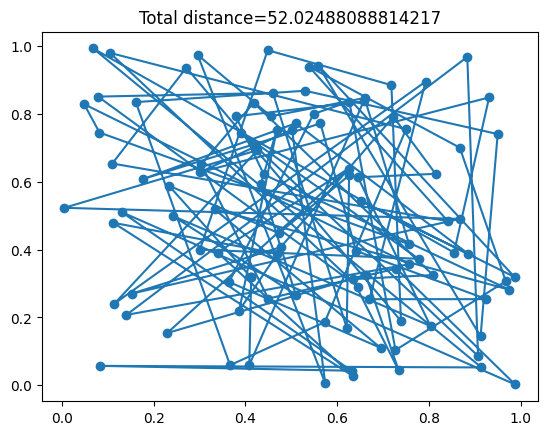

In [ ]:
from pylab import *
Plot(city,R, TotalDistance(city,R))

In [ ]:
def CostSwap(R, city, n, ncity):
    ori_dist = Distance(R[city[n-1]],R[city[n]]) + Distance(R[city[((n+1)%ncity)]],R[city[((n+2)%ncity)]]) # ncity를 나눠서 나머지를 사용해야 out of range가 안떠서 나눠줬습니다.
    new_dist = Distance(R[city[n-1]],R[city[(n+1)%ncity]]) + Distance(R[(city[n])],R[city[((n+2)%ncity)]])
    return new_dist - ori_dist

In [ ]:
def Swap(city, n, ncity):
    new_city = list(city)
    new_city[n], new_city[((n+1)%ncity)] = new_city[((n+1%ncity))], new_city[n]
    return new_city

In [ ]:
def TravelingSalesman(city, R, maxSteps, maxAccepted, Tstart, fCool, maxTsteps):
    T = Tstart
    dist = TotalDistance(city,R)
    for t in range(maxTsteps):
      accepted = 0
      for i in range(maxSteps):
        # Try swap
        n = random.randint(0,ncity-1) # 바꿀 자리 고름
        de = CostSwap(R, city, n, ncity) # 원래의 거리와 바뀐 거리의 거리 차이
        if de < 0 or exp(-de/T) > rand():
          accepted += 1
          dist += de
          city = Swap(city, n, ncity) # 바뀐 리스트
        if accepted > maxAccepted:
          break
      T *= fCool
      Plot(city, R, dist)
      print("T=%10.5f , distance=%10.5f acc.steps=%d" % (T, dist,accepted))
      if accepted == 0:
        break
      Plot(city, R, dist)
    return city

In [ ]:
from numpy import random

ncity = 10
maxSteps = 100*ncity
maxAccepted = 10*ncity
Tstart = 0.2
fCool = 0.9
maxTsteps = 100

random.seed(0)

R = random.random((ncity,2))
city = list(range(ncity))

ncity = TravelingSalesman(city, R, maxSteps, maxAccepted, Tstart, fCool, maxTsteps)

Output hidden; open in https://colab.research.google.com to view.

# GPT 코드

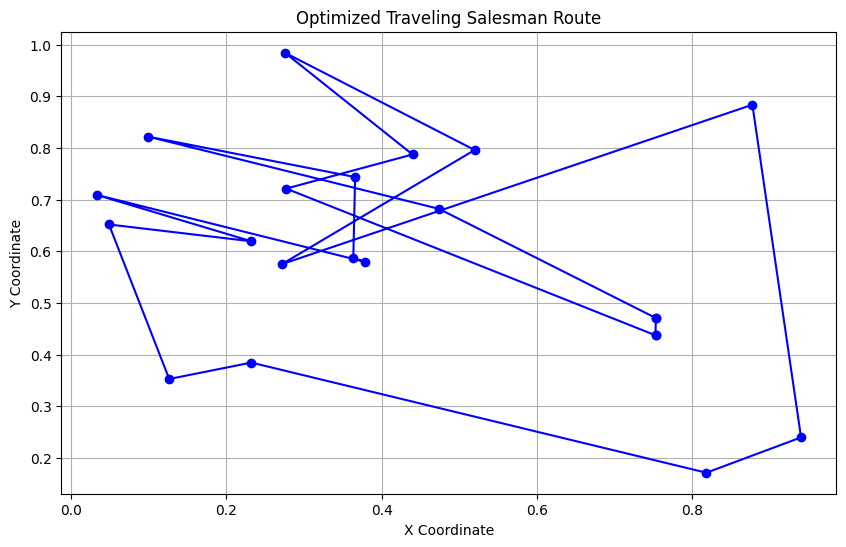

최적 경로 순서: [ 8 10 16  6  2 17  0  7 13  1  9  5 14 18  4  3 12 19 15 11]
최적 경로 거리: 6.142555600095341


In [ ]:
# 불러온 모듈들
import numpy as np
import matplotlib.pyplot as plt
import random

# 도시 좌표 생성
def generate_cities(num_cities):
    """
    랜덤하게 도시의 x, y 좌표를 생성합니다.

    num_cities: 생성할 도시의 수
    반환: (num_cities, 2) 모양의 numpy 배열
    """
    return np.random.rand(num_cities, 2)

# 거리 계산
def distance(city1, city2):
    """
    두 도시 간의 유클리드 거리를 계산합니다.

    city1, city2: 각각 도시의 좌표 (x, y)
    반환: 두 도시 간의 거리
    """
    return np.sqrt(np.sum((city1 - city2)**2))

# 경로의 총 거리 계산
def total_distance(cities, order):
    """
    특정 순서로 주어진 도시들의 전체 경로 거리를 계산합니다.

    cities: 도시 좌표 배열
    order: 도시 순서 배열
    반환: 전체 경로 거리
    """
    dist = 0
    for i in range(len(order) - 1):
        dist += distance(cities[order[i]], cities[order[i + 1]])
    dist += distance(cities[order[-1]], cities[order[0]])  # 마지막 도시에서 첫 도시로 돌아가는 거리 추가
    return dist

# 두 도시 간의 순서를 교환
def swap_cities(order):
    """
    임의의 두 도시의 위치를 교환하여 새로운 순서를 생성합니다.

    order: 현재 도시 순서 배열
    반환: 두 도시 위치를 교환한 새로운 순서 배열
    """
    new_order = order.copy()
    i, j = random.sample(range(len(order)), 2)  # 두 개의 랜덤 인덱스 선택
    new_order[i], new_order[j] = new_order[j], new_order[i]  # 위치 교환
    return new_order

# 시뮬레이티드 어닐링 알고리즘
def simulated_annealing(cities, initial_temp, cooling_rate):
    """
    시뮬레이티드 어닐링 알고리즘을 사용하여 최소 경로를 찾습니다.

    cities: 도시 좌표 배열
    initial_temp: 초기 온도
    cooling_rate: 온도 감소율
    반환: 최적 경로 순서, 최적 경로 거리
    """
    current_order = np.arange(len(cities))  # 초기 경로는 도시 인덱스의 순서
    np.random.shuffle(current_order)  # 랜덤하게 섞음
    current_distance = total_distance(cities, current_order)  # 초기 경로의 거리 계산
    best_order = current_order.copy()  # 현재 경로를 최적 경로로 설정
    best_distance = current_distance  # 현재 거리를 최적 거리로 설정

    temperature = initial_temp  # 초기 온도 설정

    while temperature > 1:  # 온도가 1보다 클 때까지 반복
        new_order = swap_cities(current_order)  # 임의의 두 도시 위치를 교환한 새로운 경로 생성
        new_distance = total_distance(cities, new_order)  # 새로운 경로의 거리 계산

        # 새로운 경로가 현재 경로보다 짧으면 새로운 경로를 선택
        if new_distance < current_distance:
            current_order = new_order
            current_distance = new_distance
            # 새로운 경로가 최적 경로보다 짧으면 최적 경로를 갱신
            if new_distance < best_distance:
                best_order = new_order
                best_distance = new_distance
        else:
            # 새로운 경로가 더 길더라도 확률적으로 선택 (온도에 따라 결정)
            if np.exp((current_distance - new_distance) / temperature) > np.random.rand():
                current_order = new_order
                current_distance = new_distance

        # 온도 감소
        temperature *= cooling_rate

    return best_order, best_distance

# 시각화 함수
def plot_cities(cities, order):
    """
    주어진 순서로 도시를 순회하는 경로를 플롯합니다.

    cities: 도시 좌표 배열
    order: 도시 순서 배열
    """
    plt.figure(figsize=(10, 6))
    plt.plot(cities[order, 0], cities[order, 1], 'o-', color='blue')
    plt.plot([cities[order[-1], 0], cities[order[0], 0]], [cities[order[-1], 1], cities[order[0], 1]], 'o-', color='blue')
    plt.title('Optimized Traveling Salesman Route')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.grid(True)
    plt.show()

# 파라미터 설정
num_cities = 20  # 도시의 수
initial_temp = 1000  # 초기 온도
cooling_rate = 0.995  # 온도 감소율

# 실행
cities = generate_cities(num_cities)  # 도시 좌표 생성
best_order, best_distance = simulated_annealing(cities, initial_temp, cooling_rate)  # 최적 경로 계산
plot_cities(cities, best_order)  # 경로 시각화

print("최적 경로 순서:", best_order)
print("최적 경로 거리:", best_distance)
